In [48]:
import pandas as pd
import numpy as np

covid_data=pd.read_csv("super_covid_data.csv")
super_covid=pd.DataFrame(covid_data)
super_covid.head()

,countyFIPS,County Name_x,State_x,StateFIPS_x,2020-01-22_x,2020-01-23_x,2020-01-24_x,2020-01-25_x,2020-01-26_x,2020-01-27_x,...,2023-07-17_y,2023-07-18_y,2023-07-19_y,2023-07-20_y,2023-07-21_y,2023-07-22_y,2023-07-23_y,County Name,State,population
0,1001,Autauga County,AL,1,0,0,0,0,0,0,...,235,235,235,235,235,235,235,Autauga County,AL,55869
1,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,731,731,731,731,731,731,731,Baldwin County,AL,223234
2,1005,Barbour County,AL,1,0,0,0,0,0,0,...,104,104,104,104,104,104,104,Barbour County,AL,24686
3,1007,Bibb County,AL,1,0,0,0,0,0,0,...,111,111,111,111,111,111,111,Bibb County,AL,22394
4,1009,Blount County,AL,1,0,0,0,0,0,0,...,261,261,261,261,261,261,261,Blount County,AL,57826


In [52]:
newjersey_data = super_covid[super_covid['State_x'] == 'NJ']

columns_cases = [col for col in newjersey_data if col.endswith('x') and '2020-07' <= col.split('_')[0] <= '2020-12']
columns_deaths = [col for col in newjersey_data if col.endswith('y') and '2020-07' <= col.split('_')[0] <= '2020-12']

def calculate_weekly_stats(data, columns):
    reshaped_data = data.melt(value_vars=columns, var_name='date', value_name='count')
    reshaped_data['date'] = pd.to_datetime(reshaped_data['date'].str[:-2])
    weekly_data = reshaped_data.groupby(pd.Grouper(key='date', freq='W')).agg(['mean', 'median', lambda x: x.mode().iloc[0]])
    weekly_data.columns = weekly_data.columns.droplevel()
    weekly_data.columns = ['mean', 'median', 'mode']
    return weekly_data

weekly_cases_stats = calculate_weekly_stats(newjersey_data, columns_cases)
weekly_deaths_stats = calculate_weekly_stats(newjersey_data, columns_deaths)

print("Weekly Cases Stats:")
print(weekly_cases_stats.head())
print("\nWeekly Deaths Stats:")
print(weekly_deaths_stats.head())

Weekly Cases Stats:
                   mean  median   mode
date                                  
2020-07-05  8185.885714  6790.0  16297
2020-07-12  8264.244898  6864.0  16297
2020-07-19  8354.326531  6932.0  16297
2020-07-26  8442.666667  7016.0  16297
2020-08-02  8593.312925  7109.0    865

Weekly Deaths Stats:
                  mean  median  mode
date                                
2020-07-05  721.419048   529.0   124
2020-07-12  733.360544   546.0    77
2020-07-19  744.210884   557.0   195
2020-07-26  748.687075   564.0   124
2020-08-02  751.598639   571.0   124


In [46]:
cases_data = pd.read_csv('total_cases.csv')
death_data = pd.read_csv('total_deaths.csv')
cases_data['date'] = pd.to_datetime(cases_data['date'])
death_data['date'] = pd.to_datetime(death_data['date'])

cases_data.set_index('date', inplace=True)
death_data.set_index('date', inplace=True)
merged_data = pd.merge(cases_data, death_data, left_index=True, right_index=True, how='outer', suffixes=('_cases', '_deaths'))

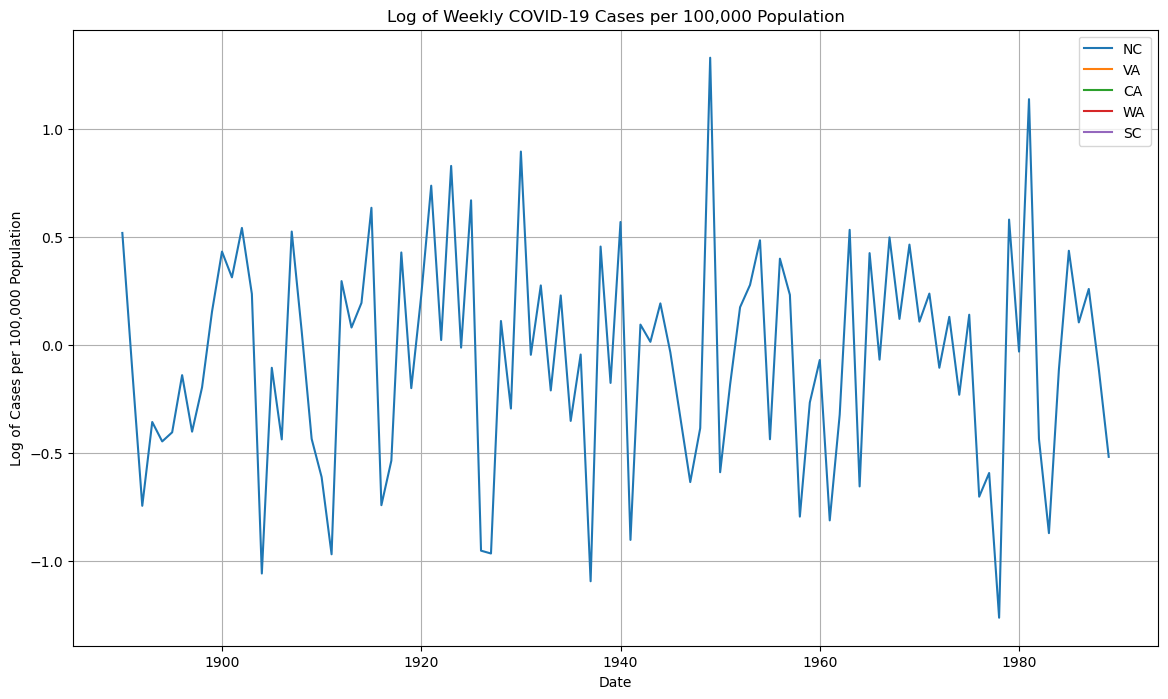

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

population = {
    #add correct populations
    #date axis is labeled incorrectly
    'NC': 331002651,
    'VA': 65273511,
    'CA': 67886011,
    'WA': 145934462,
    'SC': 37742154,
}

selected_states = ['NC', 'VA', 'CA', 'WA', 'SC']

weekly_cases_per_100k = pd.DataFrame()

start_date = '2020-07-06'
end_date = '2020-12-27'

for state in selected_states:
    pop = population[state]
    state_data = super_covid[super_covid['State_x'] == state]
    state_cases = state_data.loc[:, state_data.columns.str.startswith(start_date) | state_data.columns.str.startswith(end_date)].sum(axis=1)
    state_cases_weekly_per_100k = (state_cases / pop) * 100000
    weekly_cases_per_100k[state] = state_cases_weekly_per_100k

# Plotting
weekly_cases_log = np.log10(weekly_cases_per_100k.replace(0, np.nan))

plt.figure(figsize=(14, 8))
for state in weekly_cases_log.columns:
    plt.plot(weekly_cases_log.index, weekly_cases_log[state], label=state)
plt.title('Log of Weekly COVID-19 Cases per 100,000 Population')
plt.xlabel('Date')
plt.ylabel('Log of Cases per 100,000 Population')
plt.legend()
plt.grid(True)
plt.show()


In [62]:
import pandas as pd

# Example: Choosing New Jersey as the state of interest
state_of_interest = 'NJ'

# Filter data for the selected state
state_data = super_covid[super_covid['State_x'] == state_of_interest]

# Extract columns for cases and deaths within the specified date range
columns_cases = [col for col in state_data if col.endswith('x') and '2020-07' <= col.split('_')[0] <= '2020-12']
columns_deaths = [col for col in state_data if col.endswith('y') and '2020-07' <= col.split('_')[0] <= '2020-12']

# Function to calculate weekly statistics
def calculate_weekly_stats(data, columns):
    reshaped_data = data.melt(value_vars=columns, var_name='date', value_name='count')
    reshaped_data['date'] = pd.to_datetime(reshaped_data['date'].str[:-2])
    weekly_data = reshaped_data.groupby(pd.Grouper(key='date', freq='W')).agg(['mean', 'median', lambda x: x.mode().iloc[0]])
    weekly_data.columns = weekly_data.columns.droplevel()
    weekly_data.columns = ['mean', 'median', 'mode']
    return weekly_data

# Calculate weekly statistics for cases and deaths
weekly_cases_stats = calculate_weekly_stats(state_data, columns_cases)
weekly_deaths_stats = calculate_weekly_stats(state_data, columns_deaths)

# Calculate total cases and deaths for each county
total_cases = state_data[columns_cases].sum(axis=1)
total_deaths = state_data[columns_deaths].sum(axis=1)

# Create a DataFrame to store total cases and deaths for each county
county_stats = pd.DataFrame({'Total Cases': total_cases, 'Total Deaths': total_deaths})

# Sort counties based on total cases and deaths
sorted_counties_cases = county_stats.sort_values(by='Total Cases', ascending=False)
sorted_counties_deaths = county_stats.sort_values(by='Total Deaths', ascending=False)

# Select the top five counties with high cases and death rates
top_five_cases = sorted_counties_cases.head(5)
top_five_deaths = sorted_counties_deaths.head(5)

print("Top 5 Counties with High Cases:")
print(top_five_cases)

print("\nTop 5 Counties with High Deaths:")
print(top_five_deaths)


Top 5 Counties with High Cases:
      Total Cases  Total Deaths
1775      3557253        313167
1780      3438135        325001
1782      3313252        231646
1785      3094392        217575
1789      3020498        191466

Top 5 Counties with High Deaths:
      Total Cases  Total Deaths
1780      3438135        325001
1775      3557253        313167
1782      3313252        231646
1785      3094392        217575
1793      2860614        208228


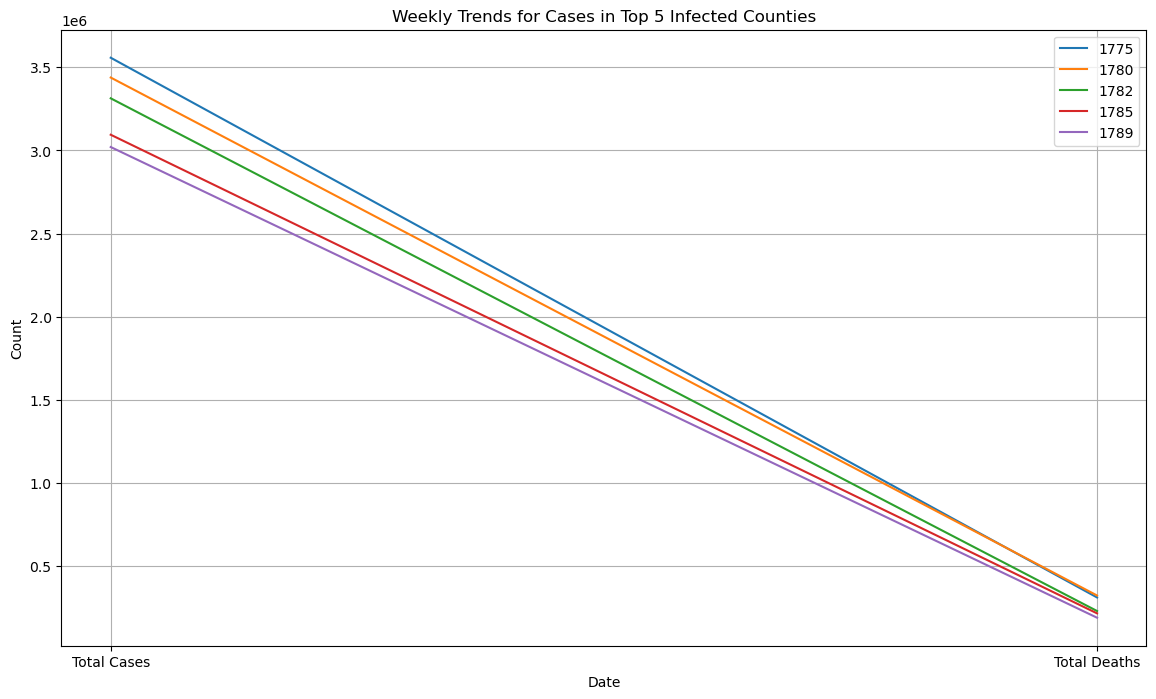

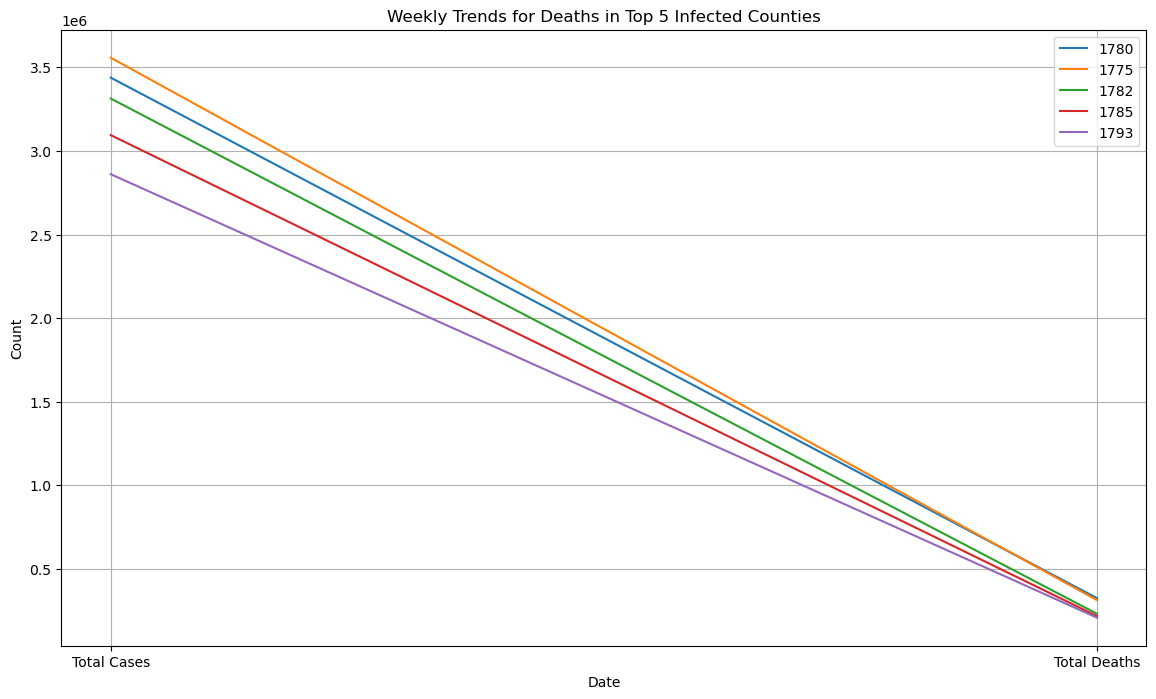

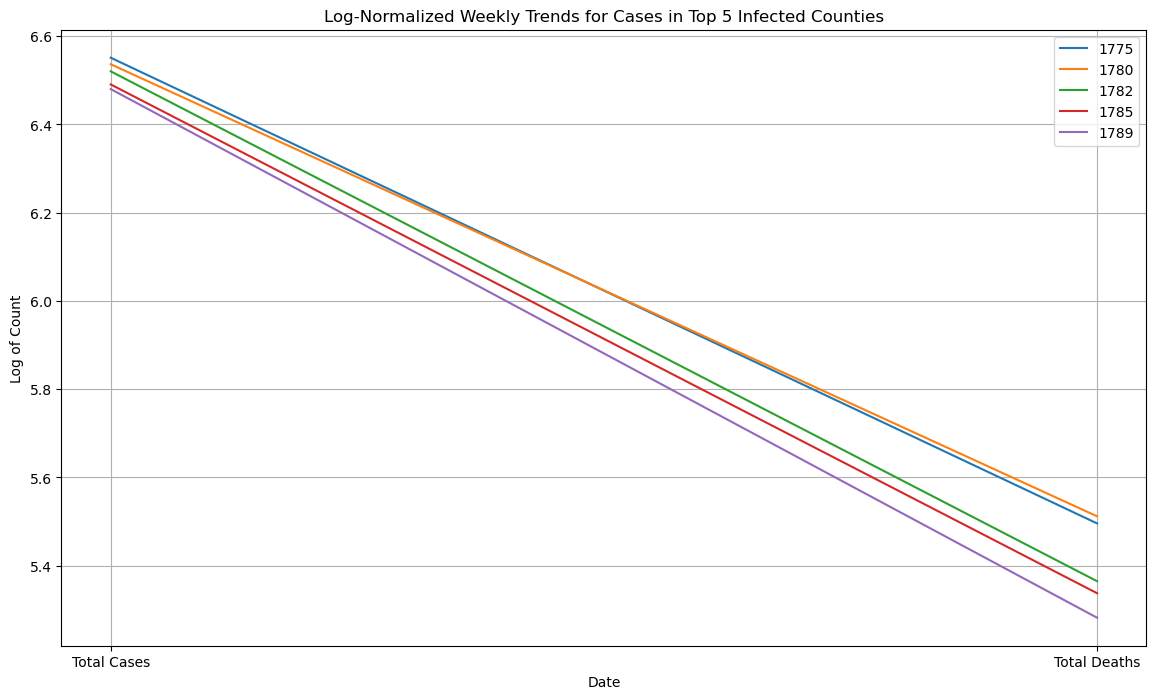

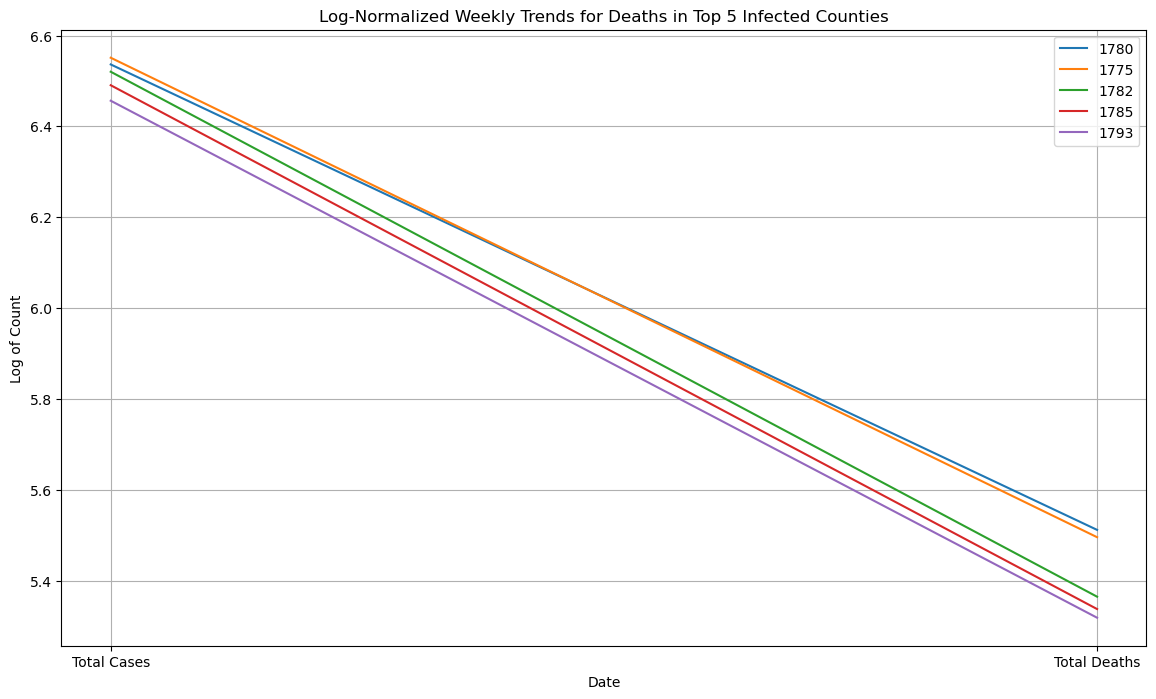

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have already calculated the top 5 infected counties
# Let's assume top_five_cases and top_five_deaths are DataFrames containing the top 5 infected counties

# Function to plot weekly trends
def plot_weekly_trends(data, title):
    plt.figure(figsize=(14, 8))
    for county in data.index:
        plt.plot(data.columns, data.loc[county], label=county)
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.legend()
    plt.grid(True)
    plt.show()

# Function to plot log-normalized weekly trends
def plot_log_normalized_weekly_trends(data, title):
    data_log = np.log10(data.replace(0, np.nan))
    plt.figure(figsize=(14, 8))
    for county in data_log.index:
        plt.plot(data_log.columns, data_log.loc[county], label=county)
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Log of Count')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot raw values for cases
plot_weekly_trends(top_five_cases, 'Weekly Trends for Cases in Top 5 Infected Counties')

# Plot raw values for deaths
plot_weekly_trends(top_five_deaths, 'Weekly Trends for Deaths in Top 5 Infected Counties')

# Plot log-normalized values for cases
plot_log_normalized_weekly_trends(top_five_cases, 'Log-Normalized Weekly Trends for Cases in Top 5 Infected Counties')

# Plot log-normalized values for deaths
plot_log_normalized_weekly_trends(top_five_deaths, 'Log-Normalized Weekly Trends for Deaths in Top 5 Infected Counties')


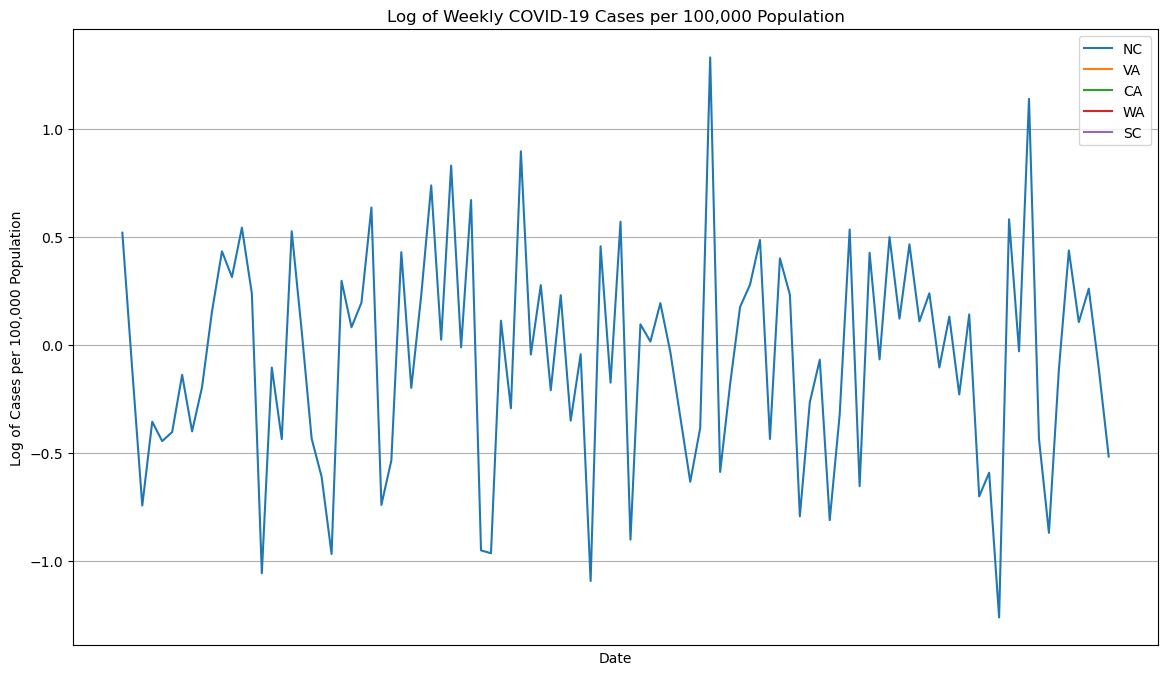

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

population = {
    'NC': 331002651,
    'VA': 65273511,
    'CA': 67886011,
    'WA': 145934462,
    'SC': 37742154,
}

selected_states = ['NC', 'VA', 'CA', 'WA', 'SC']

weekly_cases_per_100k = pd.DataFrame()

start_date = '2020-07-06'
end_date = '2020-12-27'

for state in selected_states:
    pop = population[state]
    state_data = super_covid[super_covid['State_x'] == state]
    state_cases = state_data.loc[:, state_data.columns.str.startswith(start_date) | state_data.columns.str.startswith(end_date)].sum(axis=1)
    state_cases_weekly_per_100k = (state_cases / pop) * 100000
    weekly_cases_per_100k[state] = state_cases_weekly_per_100k

# Set the index of weekly_cases_per_100k DataFrame to datetime
weekly_cases_per_100k.index = pd.to_datetime(weekly_cases_per_100k.index)

# Plotting
weekly_cases_log = np.log10(weekly_cases_per_100k.replace(0, np.nan))

plt.figure(figsize=(14, 8))
for state in weekly_cases_log.columns:
    plt.plot(weekly_cases_per_100k.index, weekly_cases_log[state], label=state)
plt.title('Log of Weekly COVID-19 Cases per 100,000 Population')
plt.xlabel('Date')
plt.ylabel('Log of Cases per 100,000 Population')
plt.legend()
plt.grid(True)
plt.show()
